In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import networkx as nx
from itertools import combinations
import nxviz as nv
from nxviz import annotate
from nxviz import highlights
from nxviz.utils import edge_table, node_table
from collections import defaultdict
import csv
from datetime import datetime
from datetime import timedelta 

# Chapter 1 - Bipartite graphs & product recommendation systems

In [2]:
G_dicts = nx.read_gpickle('github.p')

In [3]:
type(G_dicts)

networkx.classes.graph.Graph

In [4]:
G_dicts.node

{'u10002': {'bipartite': 'users'},
 'u21097': {'bipartite': 'users'},
 'u24070': {'bipartite': 'users'},
 'u31908': {'bipartite': 'users'},
 'u3885': {'bipartite': 'users'},
 'p411': {'bipartite': 'projects'},
 'p46575': {'bipartite': 'projects'},
 'u5520': {'bipartite': 'users'},
 'u19224': {'bipartite': 'users'},
 'p89577': {'bipartite': 'projects'},
 'p31723': {'bipartite': 'projects'},
 'p62704': {'bipartite': 'projects'},
 'u16890': {'bipartite': 'users'},
 'u8121': {'bipartite': 'users'},
 'p8843': {'bipartite': 'projects'},
 'u753': {'bipartite': 'users'},
 'p6824': {'bipartite': 'projects'},
 'p83134': {'bipartite': 'projects'},
 'u25547': {'bipartite': 'users'},
 'p111136': {'bipartite': 'projects'},
 'p38628': {'bipartite': 'projects'},
 'p54222': {'bipartite': 'projects'},
 'p100614': {'bipartite': 'projects'},
 'p59770': {'bipartite': 'projects'},
 'u13839': {'bipartite': 'users'},
 'p5182': {'bipartite': 'projects'},
 'u14402': {'bipartite': 'users'},
 'p82571': {'bipartit

In [5]:
G_dicts.edge

{'u10002': {'p65': {}},
 'u21097': {'p12233': {}},
 'u24070': {'p4033': {}, 'p47090': {}},
 'u31908': {'p50406': {}},
 'u3885': {'p4544': {}, 'p31679': {}, 'p381': {}, 'p2033': {}},
 'p411': {'u17518': {}, 'u9752': {}},
 'p46575': {'u16269': {}},
 'u5520': {'p114': {}, 'p6589': {}, 'p17': {}},
 'u19224': {'p5475': {}},
 'p89577': {'u13304': {}},
 'p31723': {'u3650': {}, 'u2040': {}},
 'p62704': {'u36985': {}},
 'u16890': {'p357': {}},
 'u8121': {'p30492': {}},
 'p8843': {'u3907': {}},
 'u753': {'p6194': {}},
 'p6824': {'u6401': {}, 'u4270': {}},
 'p83134': {'u217': {}},
 'u25547': {'p36524': {}},
 'p111136': {'u35982': {}},
 'p38628': {'u26566': {}},
 'p54222': {'u24178': {}},
 'p100614': {'u50438': {}},
 'p59770': {'u747': {}},
 'u13839': {'p17': {}},
 'p5182': {'u377': {}},
 'u14402': {'p23874': {}, 'p62772': {}},
 'p82571': {'u12944': {}},
 'u256': {'p3270': {}, 'p35599': {}, 'p17780': {}},
 'u3932': {'p3743': {}},
 'p3324': {'u1691': {}, 'u3525': {}},
 'p504': {'u2552': {},
  'u261

In [6]:
G_full = nx.Graph()

In [7]:
G_edges = []
for node, edges in G_dicts.edge.items():
    for e, d in edges.items():
        G_edges.append(tuple([node, e, d]))

In [8]:
G_full.add_edges_from(G_edges)

In [9]:
nx.set_node_attributes(G_full, G_dicts.node)

In [10]:
type(G_full), len(G_full.nodes), len(G_full.edges)

(networkx.classes.graph.Graph, 22451, 20000)

In [11]:
G_full.nodes(data=True)

NodeDataView({'u10002': {'bipartite': 'users'}, 'p65': {'bipartite': 'projects'}, 'u21097': {'bipartite': 'users'}, 'p12233': {'bipartite': 'projects'}, 'u24070': {'bipartite': 'users'}, 'p4033': {'bipartite': 'projects'}, 'p47090': {'bipartite': 'projects'}, 'u31908': {'bipartite': 'users'}, 'p50406': {'bipartite': 'projects'}, 'u3885': {'bipartite': 'users'}, 'p4544': {'bipartite': 'projects'}, 'p31679': {'bipartite': 'projects'}, 'p381': {'bipartite': 'projects'}, 'p2033': {'bipartite': 'projects'}, 'p411': {'bipartite': 'projects'}, 'u17518': {'bipartite': 'users'}, 'u9752': {'bipartite': 'users'}, 'p46575': {'bipartite': 'projects'}, 'u16269': {'bipartite': 'users'}, 'u5520': {'bipartite': 'users'}, 'p114': {'bipartite': 'projects'}, 'p6589': {'bipartite': 'projects'}, 'p17': {'bipartite': 'projects'}, 'u19224': {'bipartite': 'users'}, 'p5475': {'bipartite': 'projects'}, 'p89577': {'bipartite': 'projects'}, 'u13304': {'bipartite': 'users'}, 'p31723': {'bipartite': 'projects'}, 'u3

In [12]:
G_full.edges(data=True)

EdgeDataView([('u10002', 'p65', {}), ('p65', 'u1425', {}), ('p65', 'u7721', {}), ('p65', 'u759', {}), ('p65', 'u2596', {}), ('p65', 'u1955', {}), ('p65', 'u8582', {}), ('p65', 'u12819', {}), ('p65', 'u26751', {}), ('p65', 'u2406', {}), ('p65', 'u2562', {}), ('p65', 'u4918', {}), ('p65', 'u1083', {}), ('p65', 'u7384', {}), ('p65', 'u12731', {}), ('p65', 'u1492', {}), ('p65', 'u139', {}), ('p65', 'u8683', {}), ('p65', 'u1575', {}), ('p65', 'u6926', {}), ('p65', 'u48984', {}), ('p65', 'u108', {}), ('p65', 'u5125', {}), ('p65', 'u322', {}), ('p65', 'u1762', {}), ('p65', 'u7330', {}), ('p65', 'u87', {}), ('p65', 'u4881', {}), ('p65', 'u3970', {}), ('p65', 'u5108', {}), ('p65', 'u1455', {}), ('p65', 'u52', {}), ('p65', 'u7493', {}), ('p65', 'u3813', {}), ('p65', 'u7808', {}), ('p65', 'u1731', {}), ('p65', 'u978', {}), ('u21097', 'p12233', {}), ('u24070', 'p4033', {}), ('u24070', 'p47090', {}), ('p4033', 'u72', {}), ('u31908', 'p50406', {}), ('u3885', 'p4544', {}), ('u3885', 'p31679', {}), ('

The degree centrality for a node is the fraction of nodes it is connected to.<br>
The degree centrality values are normalized by dividing by the maximum possible degree in a simple graph n-1 where n is the number of nodes in G.
<br>
For multigraphs or graphs with self loops the maximum degree might be higher than n-1 and values of degree centrality greater than 1 are possible.

In [13]:
# Add the degree centrality score of each node to their metadata dictionary
dcs = nx.degree_centrality(G_full)
for n in G_full.nodes():
    G_full.nodes[n]['centrality'] = dcs[n]

In [14]:
G_sub_nodes = ['u3568', 'u1919', 'p25235', 'u784', 'u880', 'u23363', 'u9659', 'u29113', 'u51', 'u21997', 'u5110', 'u4090', 'u696', 'u4881', 'u12942', 'u5017', 'u13704', 'u5108', 'u12934', 'u1119', 'u9538', 'p61', 'u8206', 'u10463', 'u18779', 'u1652', 'u6914', 'u1982', 'u1053', 'u20134', 'u16626', 'u17982', 'p86327', 'p131', 'u31584', 'u17980', 'u2587', 'u200', 'u728', 'p2634', 'u5633', 'u19722', 'u1390', 'u5777', 'u1247', 'u46451', 'u15721', 'u8318', 'u47128', 'u7254', 'u6187', 'u360', 'u3970', 'u24662', 'u1080', 'u1345', 'u1380', 'u13981', 'u387', 'u5709', 'u7807', 'u5068', 'u20595', 'u264', 'u83', 'u10811', 'p178', 'u2908', 'u12109', 'u5576', 'u2764', 'u10540', 'u5350', 'u2584', 'u16890', 'u2315', 'u7954', 'u10680', 'u31344', 'u15915', 'u10002', 'u6377', 'p22862', 'u681', 'u2075', 'u3007', 'u4395', 'u14401', 'p952', 'u20357', 'u21454', 'u3071', 'u13360', 'u29122', 'u2875', 'u7052', 'u9938', 'u7690', 'u1585', 'u3697', 'u9594', 'u5242', 'u4841', 'u5438', 'u31997', 'u1771', 'p3266', 'u4455', 'p116', 'u10041', 'u691', 'u16204', 'u367', 'u21113', 'u15750', 'u17919', 'u11161', 'u6101', 'u2741', 'u18743', 'u301', 'u3397', 'u16988', 'u2037', 'u625', 'u9686', 'u10266', 'u29821', 'p1854', 'u7355', 'u7492', 'u23965', 'p236', 'u10512', 'u7963', 'u4834', 'u45126', 'u836', 'u26847', 'u5269', 'u1947', 'u6268', 'u4613', 'u2278', 'u863', 'u13630', 'u25002', 'p1909', 'u23852', 'u8674', 'u40999', 'u9203', 'u7380', 'u5721', 'p1035', 'u21202', 'u1731', 'u1126', 'u29151', 'u8006', 'u21279', 'u1472', 'u18089', 'u2394', 'u4228', 'u18837', 'p13085', 'u25417', 'u5771', 'u7049', 'u7223', 'u6', 'u17388', 'u35071', 'u40886', 'u11868', 'u21480', 'u16788', 'u1631', 'u3726', 'u1779', 'u1411', 'u446', 'u703', 'u18008', 'u8717', 'u29626', 'u7348', 'u8286', 'u12881', 'u6644', 'u7743', 'u9088', 'u537', 'u1455', 'u3578', 'p701', 'u4618', 'u2294', 'u3565', 'u24461', 'u4239', 'u1442', 'p2873', 'p2282', 'u5749', 'u8167', 'u9345', 'u1029', 'u37183', 'u1992', 'u14636', 'p562', 'u14084', 'u17311', 'u27463', 'p20804', 'u15053', 'u11315', 'u39174', 'u1123', 'u3439', 'u10769', 'u16827', 'u6936', 'u18147', 'u4674', 'u14155', 'u20323', 'u1584', 'u5716', 'u48483', 'u8884', 'p39860', 'u3252', 'u13404', 'u1336', 'u18734', 'u11145', 'u7442', 'u5248', 'p15212', 'u5742', 'u235', 'u7436', 'u8480', 'u9237', 'u9162', 'u2230', 'u2253', 'p103', 'u16840', 'u16491', 'u829', 'u8988', 'u1978', 'u2450', 'u312', 'u17966', 'u89', 'u5424', 'u19679', 'u11011', 'u8588', 'u627', 'u930', 'u407', 'u1436', 'u24086', 'u4939', 'p8036', 'p15', 'u108', 'u69', 'u6999', 'u23167', 'u1961', 'u19614', 'u2707', 'p101', 'u3773', 'u3002', 'u1692', 'u781', 'u8417', 'u2153', 'u4817', 'u4515', 'u7493', 'u9969', 'u1322', 'u2284', 'u44023', 'u10016', 'u19769', 'u7911', 'u5379', 'u16819', 'u4131', 'p11462', 'u14934', 'p725', 'u3520', 'u1772', 'u1758', 'u347', 'u18279', 'u1538', 'u6158', 'u19564', 'u2665', 'u3426', 'u4957', 'p5368', 'u1189', 'u6650', 'p7171', 'u6607', 'u9240', 'u1573', 'u4068', 'u11712', 'u13182', 'u20586', 'u204', 'u7398', 'p93877', 'u8987', 'u8683', 'u9273', 'u31592', 'u15139', 'u25639', 'u2038', 'p11556', 'u13898', 'p3542', 'u775', 'u1672', 'u12416', 'u46923', 'u206', 'u12699', 'u4390', 'u7571', 'u3511', 'p31733', 'u9903', 'u4203', 'u14907', 'u1588', 'u7347', 'u24983', 'u1501', 'u8948', 'u22121', 'u2760', 'u695', 'u2810', 'u28', 'u1121', 'u1364', 'u2040', 'u11116', 'u2757', 'u34685', 'u2204', 'u489', 'u20430', 'p911', 'u3293', 'u5134', 'u635', 'u12805', 'u13515', 'u245', 'u2223', 'u8529', 'u8704', 'u3267', 'u5571', 'u11159', 'p120001', 'p19660', 'u11212', 'p3315', 'u4448', 'u289', 'u17532', 'p2545', 'u12532', 'p645', 'u16539', 'u15041', 'u654', 'u3360', 'u15924', 'u2562', 'p4164', 'p8815', 'u2535', 'p16999', 'u5524', 'u363', 'u16074', 'u1539', 'u5306', 'u4356', 'u505', 'u1879', 'u13858', 'u2476', 'u759', 'u8816', 'p14972', 'u19095', 'u6498', 'u12395', 'u4197', 'u11607', 'u3813', 'u147', 'u10339', 'u1950', 'u32630', 'u4912', 'p39625', 'u10484', 'u11026', 'p1085', 'u5959', 'u1151', 'u308', 'u10032', 'u12083', 'u1678', 'u2111', 'u12659', 'u832', 'u28097', 'u4154', 'u1808', 'u1012', 'p6816', 'u11141', 'u3448', 'u39152', 'u168', 'u823', 'u9935', 'u7087', 'u33470', 'u4918', 'u14739', 'u10104', 'u17601', 'u5451', 'u53396', 'u5614', 'u52', 'u8570', 'u844', 'u21660', 'u302', 'u3913', 'u842', 'p1340', 'u10819', 'u19870', 'u5125', 'p17', 'u4471', 'p3561', 'u406', 'u23712', 'u55229', 'u9188', 'u20773', 'p2090', 'u43513', 'u51973', 'u4156', 'u790', 'u183', 'u663', 'u5928', 'u567', 'u1788', 'u7519', 'u20251', 'u285', 'u40859', 'u8314', 'u9122', 'u8057', 'p350', 'u24967', 'u6408', 'u17415', 'u16177', 'u10824', 'u17216', 'u1839', 'u9908', 'u6707', 'u15580', 'u1835', 'u24587', 'u6613', 'u1087', 'u46347', 'u23221', 'u1203', 'u35120', 'u4014', 'u1262', 'u4571', 'u15320', 'u24619', 'u6339', 'u892', 'u13305', 'u16223', 'u2224', 'u12731', 'u974', 'u584', 'p5046', 'u1288', 'u26589', 'u12319', 'u10753', 'u306', 'p291', 'u29124', 'u5718', 'u7390', 'u20444', 'p665', 'u2317', 'u7881', 'u3889', 'u198', 'u15374', 'u1492', 'u5078', 'u5286', 'u6906', 'u1576', 'p3395', 'u32507', 'u2094', 'u9687', 'u11888', 'u435', 'u13512', 'u2141', 'u10608', 'u1420', 'u5527', 'u4889', 'u12259', 'u9816', 'u7902', 'u10770', 'u3936', 'u950', 'u13415', 'p953', 'u18362', 'u34460', 'u7074', 'u54872', 'u1045', 'u4047', 'u2653', 'u14343', 'u2152', 'u958', 'p104516', 'u2782', 'u13005', 'u88', 'u571', 'u527', 'u22271', 'u1676', 'u16', 'u7722', 'p1009', 'u2048', 'p42828', 'u2404', 'u9784', 'u5918', 'u1837', 'u4690', 'u3197', 'u38009', 'u290', 'p284', 'u55949', 'u13567', 'u3166', 'u13536', 'p53157', 'u18458', 'u5366', 'u535', 'u2378', 'u20955', 'u21495', 'u8420', 'u8110', 'p2514', 'u3986', 'u47706', 'u13325', 'p82884', 'u5283', 'u18425', 'p28596', 'u1415', 'u12425', 'u16309', 'u3843', 'u4629', 'p8357', 'u13958', 'u26751', 'u7635', 'u7798', 'u990', 'u3980', 'u17147', 'p607', 'u1814', 'p5299', 'u4900', 'u5812', 'u3686', 'u271', 'u28595', 'u7319', 'u1254', 'u13100', 'p2280', 'u7257', 'u2275', 'u1202', 'p22140', 'u376', 'u8969', 'p1658', 'p878', 'u22294', 'u9393', 'u46622', 'u6870', 'u10758', 'u11766', 'u3589', 'p55926', 'p299', 'u964', 'u9873', 'u7388', 'u10862', 'u4980', 'u4914', 'u18056', 'u10755', 'u9342', 'u5971', 'u7261', 'u7909', 'u7946', 'u1440', 'u22730', 'u23320', 'u16097', 'u2724', 'u3751', 'u5449', 'p97', 'u1703', 'u10219', 'u1644', 'u872', 'p9110', 'u1063', 'u5250', 'u7476', 'u708', 'u11414', 'u2823', 'u8883', 'p63478', 'u7634', 'u10623', 'u646', 'u1614', 'u460', 'u7808', 'u5383', 'u6203', 'p114', 'u7475', 'u1852', 'u7405', 'p35480', 'u2857', 'u1406', 'u17181', 'u24846', 'u7384', 'u1707', 'p1092', 'p2646', 'u15006', 'u2616', 'p3251', 'u15439', 'u3731', 'p109281', 'u2422', 'u4334', 'u1230', 'u8753', 'u3280', 'u13902', 'u9577', 'u6164', 'u32053', 'u20627', 'u4303', 'u15542', 'u4004', 'u22642', 'u23800', 'u2221', 'u1610', 'u1069', 'u1451', 'u3395', 'u10009', 'u4363', 'p8616', 'u1575', 'u8135', 'u6732', 'u2765', 'p357', 'u6462', 'u54834', 'u10544', 'u21102', 'u14212', 'u272', 'u3247', 'u746', 'p7392', 'u1552', 'u9228', 'p4893', 'u3414', 'u30179', 'u2822', 'p2804', 'u9002', 'p8360', 'u10667', 'u24748', 'u43385', 'u1393', 'u4711', 'u2057', 'u13540', 'u13441', 'u59', 'u19108', 'u3139', 'u6441', 'u724', 'u2780', 'p20876', 'u6684', 'u30076', 'u2652', 'u6815', 'u3306', 'u16465', 'u3390', 'u19547', 'u1043', 'u12196', 'u8946', 'u13754', 'u769', 'p120674', 'u1149', 'u16389', 'u422', 'u38', 'u2586', 'u7977', 'p3802', 'u975', 'u6727', 'u13302', 'u1762', 'u2337', 'u238', 'u6546', 'u322', 'u6816', 'u17055', 'u8854', 'u15133', 'u29372', 'u1483', 'u6326', 'u1058', 'u21908', 'u33067', 'u139', 'u4790', 'u19776', 'u14242', 'u8507', 'u4439', 'u710', 'u11560', 'u1083', 'u8444', 'u14641', 'u22739', 'u12167', 'u647', 'u534', 'u6812', 'u1753', 'p1546', 'u31002', 'u8453', 'u1425', 'u13387', 'u20073', 'u36491', 'u12061', 'u12013', 'u2870', 'u2842', 'u4022', 'u23782', 'u1673', 'u2227', 'u351', 'u13596', 'p11038', 'u1148', 'u8541', 'p41712', 'u46384', 'u7045', 'u4123', 'u1955', 'u2836', 'u1433', 'p189', 'u17072', 'p1857', 'u758', 'u14432', 'u18169', 'p1545', 'u47644', 'u1787', 'u2768', 'u41577', 'u13460', 'u8789', 'u2097', 'u11423', 'u12933', 'u28957', 'p2562', 'u5901', 'u6042', 'u5941', 'u23906', 'u17474', 'p103214', 'u4706', 'u11608', 'p11518', 'u2506', 'u572', 'u1449', 'u22842', 'u501', 'u4911', 'p2045', 'u1937', 'u2933', 'u5312', 'u25210', 'p1319', 'p1183', 'u3946', 'u4397', 'u48233', 'u36081', 'p39012', 'u7192', 'u2956', 'u5478', 'u3253', 'u3243', 'u875', 'u3175', 'u1409', 'u2514', 'p1170', 'u8718', 'p18661', 'u9696', 'u23479', 'u15510', 'u2527', 'u393', 'u10244', 'u3116', 'u10085', 'u11660', 'u25067', 'u19254', 'p48096', 'u12790', 'p162', 'u1691', 'p25995', 'u9425', 'u14738', 'u5637', 'u6427', 'u14941', 'u8953', 'u20', 'u3588', 'p79617', 'u2406', 'u16107', 'p689', 'u3332', 'u3107', 'p223', 'u7373', 'u904', 'u1828', 'u8408', 'u16579', 'u1850', 'u17714', 'u365', 'u10425', 'u8737', 'u11571', 'u3632', 'u13917', 'u9026', 'u2222', 'u3729', 'u15281', 'u6969', 'p6503', 'p298', 'u817', 'u23217', 'p53720', 'u15715', 'u4675', 'p3295', 'p3604', 'u24430', 'u2479', 'u11126', 'u53', 'u14014', 'u1266', 'u3540', 'u28872', 'u1866', 'u401', 'u2044', 'u1340', 'u1140', 'u3045', 'u87', 'u5340', 'u2509', 'p18007', 'u18030', 'u6395', 'u21688', 'u2688', 'u3897', 'p19540', 'u1998', 'u22452', 'u8769', 'u5534', 'p13168', 'u6758', 'u2480', 'u7471', 'u1384', 'u1398', 'u5729', 'p4301', 'u86', 'u51420', 'p16038', 'p39010', 'u6970', 'u334', 'p5704', 'u27327', 'u5220', 'u11956', 'u40447', 'u3494', 'u2927', 'u9033', 'u4129', 'u10373', 'p186', 'u7353', 'u8093', 'u4317', 'u6742', 'u1632', 'u632', 'u9761', 'u9144', 'u11396', 'u11707', 'u14119', 'u2712', 'p1079', 'u8387', 'p31653', 'u8284', 'u51085', 'p12812', 'u1658', 'u1975', 'u7229', 'u5400', 'u5488', 'u3040', 'u2150', 'u2854', 'u14589', 'u5408', 'u299', 'p23219', 'u20307', 'u2056', 'u9765', 'u13839', 'u26622', 'u226', 'u7709', 'u6925', 'p5529', 'u6645', 'u3994', 'u6350', 'u10142', 'u2721', 'u112', 'u11279', 'u50665', 'u26910', 'u5635', 'u702', 'u12697', 'u6977', 'u10051', 'u12184', 'u24200', 'u6905', 'u10937', 'u3287', 'p985', 'u940', 'u6361', 'u3610', 'u11056', 'u8596', 'u25054', 'u4029', 'u35476', 'u5088', 'p558', 'u1560', 'u3745', 'p6894', 'u3945', 'u3110', 'u7779', 'u53159', 'u2127', 'u914', 'u16733', 'u3453', 'u2486', 'u3939', 'u18358', 'p16327', 'u587', 'u19671', 'u1979', 'u7890', 'p671', 'u2077', 'u15475', 'u11075', 'p3095', 'p647', 'u368', 'u922', 'u2569', 'u11235', 'u3636', 'u1278', 'p5436', 'u485', 'u6868', 'u15110', 'u932', 'u5411', 'u49373', 'u589', 'u9245', 'p37885', 'u5803', 'p845', 'u1720', 'p138', 'u8431', 'u7483', 'u14306', 'u5520', 'u22874', 'u9298', 'u29288', 'u175', 'u5970', 'p1328', 'p5706', 'u8221', 'u2852', 'u21378', 'u12813', 'u1890', 'u9904', 'u13834', 'u3595', 'u5323', 'u9621', 'p7091', 'u23970', 'u3569', 'u1211', 'u2133', 'u15369', 'u1679', 'u4730', 'u5695', 'u23082', 'u1910', 'u22016', 'u1056', 'u955', 'u9343', 'p2150', 'u2398', 'u684', 'u10349', 'u4927', 'u6926', 'u2570', 'p26828', 'u4458', 'p1478', 'u978', 'u36', 'u6844', 'u4136', 'p1179', 'u9741', 'u316', 'u2416', 'u7594', 'u12664', 'u4080', 'u1305', 'u26130', 'u21351', 'u5745', 'u7396', 'u3666', 'u17066', 'u20271', 'p46796', 'u1780', 'u4408', 'u2796', 'u23608', 'u6982', 'u5759', 'u48', 'u3720', 'p9183', 'u2148', 'p1229', 'u3106', 'u544', 'u95', 'u2002', 'u5582', 'u15499', 'u6234', 'u8797', 'u14055', 'u12888', 'u11896', 'u744', 'u8187', 'u1212', 'u12834', 'u5073', 'u2068', 'u4946', 'u8767', 'u868', 'u4101', 'u27708', 'p19941', 'u4019', 'u2950', 'u44', 'u569', 'u15716', 'u18428', 'u8874', 'u361', 'u16387', 'u8256', 'p1050', 'u6207', 'u30', 'u2169', 'u14378', 'u4323', 'u6153', 'u19601', 'u9194', 'u2730', 'u7320', 'u27492', 'u3479', 'u7908', 'u18265', 'u3454', 'p23284', 'u6250', 'p1986', 'p1222', 'u9075', 'u5657', 'u16048', 'u6725', 'u1049', 'u1032', 'u935', 'u6290', 'p18292', 'u254', 'u6580', 'u30317', 'u5015', 'u3934', 'u21965', 'u13574', 'u1454', 'u11897', 'u931', 'u4756', 'p10010', 'u1208', 'p3784', 'u140', 'u14473', 'u12296', 'p1514', 'u18071', 'u20050', 'p604', 'u16873', 'u1204', 'p2551', 'u16302', 'u20520', 'u6473', 'u1619', 'u159', 'p2277', 'u6229', 'u92', 'u6316', 'u7721', 'u7456', 'u16297', 'u986', 'u666', 'u15692', 'u1407', 'u5525', 'u1898', 'u21477', 'u1152', 'p1148', 'u437', 'u10340', 'u46527', 'u18323', 'u3456', 'p65', 'u1240', 'p3051', 'u1895', 'u1146', 'u6881', 'u1726', 'u2472', 'u2906', 'u2459', 'u2242', 'u2008', 'u17708', 'u5458', 'u3123', 'u10211', 'u6437', 'u7510', 'u11505', 'u19011', 'u48984', 'u4270', 'u26930', 'u8666', 'u719', 'u48716', 'u4776', 'u530', 'u42326', 'u7271', 'u84', 'u16562', 'u2046', 'u723', 'p1736', 'u801', 'u15647', 'u4053', 'u6733', 'u343', 'u45824', 'p18592', 'u13257', 'u4208', 'u1106', 'p1299', 'p2593', 'u6560', 'u2678', 'u2573', 'u215', 'u7696', 'u20816', 'u7330', 'p2131', 'u7570', 'u21752', 'u10566', 'u6975', 'u18643', 'u11762', 'u2320', 'u12332', 'u4045', 'u38824', 'u16279', 'u4057', 'u25383', 'u10280', 'u1197', 'u45637', 'p896', 'u3574', 'u5135', 'u5010', 'u19369', 'u5936', 'u2212', 'u608', 'u12284', 'u22431', 'u7100', 'u862', 'p515', 'u4783', 'u7887', 'u2137', 'u258', 'p35818', 'u26872', 'u39746', 'u6528', 'u5290', 'p10738', 'u255', 'u14075', 'u82', 'u987', 'u36982', 'u10884', 'u3248', 'u4833', 'u3120', 'u2391', 'u3033', 'u14465', 'u4182', 'u18631', 'u14435', 'u791', 'u9900', 'u1777', 'u846', 'u1749', 'u6682', 'u2256', 'u6661', 'u6172', 'u816', 'u44372', 'u37359', 'u16985', 'u35047', 'u2510', 'u20543', 'u6174', 'p22025', 'u1180', 'u5511', 'u4826', 'u558', 'u15600', 'p4756', 'u8577', 'u2120', 'u456', 'u8795', 'u19020', 'u7765', 'u1859', 'u2898', 'u765', 'u31133', 'u8061', 'p10548', 'p6589', 'u15556', 'u5157', 'u17047', 'u24868', 'u11972', 'u4501', 'u16800', 'u5588', 'u1546', 'p2965', 'u7515', 'u1144', 'u1111', 'p1958', 'u3468', 'u399', 'u1648', 'u7579', 'u3522', 'u3693', 'u2771', 'u4503', 'u5375', 'p10866', 'p839', 'p743', 'u13784', 'u23585', 'u13762', 'u18411', 'p1123', 'u10265', 'p37868', 'u28342', 'p383', 'u118', 'u11816', 'p4208', 'u33527', 'u15691', 'u233', 'u5563', 'u15416', 'u14304', 'u2189', 'u15395', 'u1880', 'p7855', 'u11236', 'p28054', 'u809', 'u4689', 'u1868', 'u4960', 'u5956', 'u7903', 'u3670', 'u13616', 'u8520', 'u11317', 'u20168', 'u3942', 'u3894', 'u2547', 'p2585', 'u13007', 'u11631', 'u7422', 'u31841', 'u21244', 'u698', 'p286', 'u655', 'u506', 'u2504', 'p1584', 'u7473', 'u1066', 'u8582', 'u1642', 'u3790', 'u1379', 'u9338', 'u1798', 'u10747', 'u7213', 'u14181', 'u5416', 'u358', 'u673', 'p49968', 'u1357', 'u3483', 'u106', 'u5916', 'u195', 'u9107', 'p1336', 'u8112', 'p50218', 'u7393', 'u25084', 'u10505', 'u2844', 'u44762', 'u3128', 'p52539', 'u4364', 'p3678', 'p3654', 'u14776', 'u36889', 'u43656', 'p2237', 'u30986', 'u5158', 'u11142', 'u35914', 'u2464', 'u327', 'p2754', 'u6749', 'p7760', 'u10214', 'u3702', 'p2888', 'u12819', 'p29', 'u6431', 'u20163', 'p36939', 'u9275', 'u24', 'u6021', 'u3577', 'u1153', 'u1682', 'u9599', 'u774', 'u7677', 'u273', 'u20268', 'u3153', 'u5228', 'u2863', 'u1034', 'u2901', 'u9186', 'u7204', 'u18770', 'u2596', 'p545', 'u712', 'u6869', 'u1911', 'u21', 'p233', 'u16528', 'u21976', 'u45017', 'u9153', 'u23538', 'u4284', 'u33154', 'u5055', 'u17598', 'u3990', 'u929', 'p53786', 'p18015', 'u14467', 'u3329', 'u21251', 'u5674', 'u10848', 'u23683', 'u5845', 'u2254', 'u1267', 'u15928', 'u3134', 'u6077', 'u7520', 'p8', 'u13258', 'u36130', 'u2831', 'u9911', 'u17053', 'u298', 'u5177', 'u1736', 'p2734', 'u31652', 'u3142', 'u19687', 'u11088']
G_sub = G_full.subgraph(G_sub_nodes)
type(G_sub), len(G_sub.nodes), len(G_sub.edges)

(networkx.classes.graph.Graph, 1683, 1954)

In [15]:
G = G_sub

In [18]:
# ?nv.circos

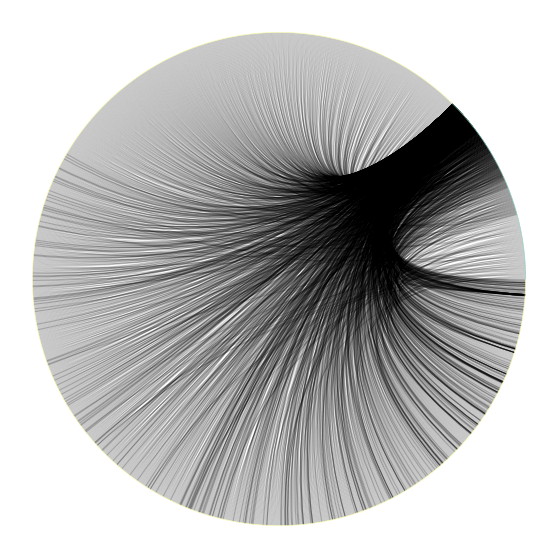

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = nv.circos(G, node_color_by='bipartite', group_by='bipartite', sort_by='centrality')
plt.show()

In [20]:
G = G_full

In [21]:
# Define get_nodes_from_partition()
def get_nodes_from_partition(G, partition):
    # Initialize an empty list for nodes to be returned
    nodes = []
    # Iterate over each node in the graph G
    for n in G.nodes():
        # Check that the node belongs to the particular partition
        if G.nodes[n]['bipartite'] == partition:
            # If so, append it to the list of nodes
            nodes.append(n)
    return nodes

In [22]:
# Print the number of nodes in the 'projects' partition
print(len(get_nodes_from_partition(G, 'projects')))

# Print the number of nodes in the 'users' partition
print(len(get_nodes_from_partition(G, 'users')))

11774
10677


In [23]:
G = G_sub

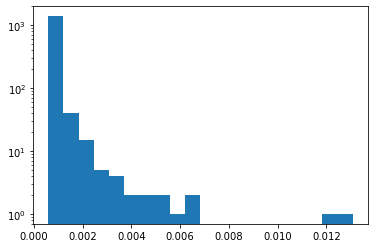

In [24]:
# Get the 'users' nodes: user_nodes
user_nodes = get_nodes_from_partition(G, 'users')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G)

# Get the degree centralities for user_nodes: user_dcs
user_dcs = [dcs[n] for n in user_nodes]

# Plot the degree distribution of users_dcs
plt.yscale('log')
plt.hist(user_dcs, bins=20)
plt.show()

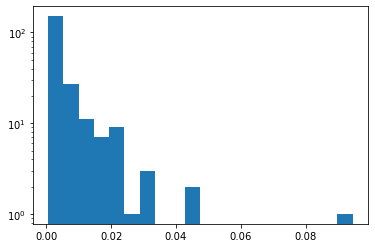

In [25]:
# Get the 'projects' nodes: project_nodes
project_nodes = get_nodes_from_partition(G, 'projects')

# Compute the degree centralities: dcs
dcs = nx.degree_centrality(G)

# Get the degree centralities for project_nodes: project_dcs
project_dcs = [dcs[n] for n in project_nodes]

# Plot the degree distribution of project_dcs
plt.yscale('log')
plt.hist(project_dcs, bins=20)
plt.show()

In [26]:
G = G_full

In [27]:
def shared_partition_nodes(G, node1, node2):
    # Check that the nodes belong to the same partition
    assert G.nodes[node1]['bipartite'] == G.nodes[node2]['bipartite']

    # Get neighbors of node 1: nbrs1
    nbrs1 = G.neighbors(node1)
    # Get neighbors of node 2: nbrs2
    nbrs2 = G.neighbors(node2)

    # Compute the overlap using set intersections
    overlap = set(nbrs1).intersection(nbrs2)
    return overlap

In [28]:
# Print the number of shared repositories between users 'u7909' and 'u2148'
print(len(shared_partition_nodes(G, 'u7909', 'u2148')))

3


In [29]:
def user_similarity(G, user1, user2, proj_nodes):
    # Check that the nodes belong to the 'users' partition
    assert G.nodes[user1]['bipartite'] == 'users'
    assert G.nodes[user2]['bipartite'] == 'users'

    # Get the set of nodes shared between the two users
    shared_nodes = shared_partition_nodes(G, user1, user2)

    # Return the fraction of nodes in the projects partition
    return len(shared_nodes) / len(proj_nodes)

In [30]:
# Compute the similarity score between users 'u4560' and 'u1880'
project_nodes = get_nodes_from_partition(G, 'projects')
similarity_score = user_similarity(G, 'u4560', 'u1880', project_nodes)

print(similarity_score)

0.0


In [31]:
def most_similar_users(G, user, user_nodes, proj_nodes):
    # Data checks
    assert G.nodes[user]['bipartite'] == 'users'

    # Get other nodes from user partition
    user_nodes = set(user_nodes)
    user_nodes.remove(user)

    # Create the dictionary: similarities
    similarities = defaultdict(list)
    for n in user_nodes:
        similarity = user_similarity(G, user, n, proj_nodes)
        similarities[similarity].append(n)

    # Compute maximum similarity score: max_similarity
    max_similarity = max(similarities.keys())

    # Return list of users that share maximal similarity
    return similarities[max_similarity]

In [32]:
user_nodes = get_nodes_from_partition(G, 'users')
project_nodes = get_nodes_from_partition(G, 'projects')

print(most_similar_users(G, 'u4560', user_nodes, project_nodes))

['u9525', 'u2800', 'u1570', 'u363', 'u14984', 'u53']


In [33]:
def recommend_repositories(G, from_user, to_user):
    # Get the set of repositories that from_user has contributed to
    from_repos = set(G.neighbors(from_user))
    # Get the set of repositories that to_user has contributed to
    to_repos = set(G.neighbors(to_user))

    # Identify repositories that the from_user is connected to that the to_user is not connected to
    return from_repos.difference(to_repos)

In [34]:
# Print the repositories to be recommended
print(recommend_repositories(G, 'u7909', 'u2148'))

{'p7408', 'p66', 'p32418', 'p9312'}


# Chapter 2 - Graph projections

In [35]:
df_ar = pd.read_csv('american-revolution.csv')
df_ar.rename(columns={'Unnamed: 0': 'People'}, inplace=True)
df_ar.head()

,People,StAndrewsLodge,LoyalNine,NorthCaucus,LongRoomClub,TeaParty,BostonCommittee,LondonEnemies
0,Adams.John,0,0,1,1,0,0,0
1,Adams.Samuel,0,0,1,1,0,1,1
2,Allen.Dr,0,0,1,0,0,0,0
3,Appleton.Nathaniel,0,0,1,0,0,1,0
4,Ash.Gilbert,1,0,0,0,0,0,0


In [36]:
df_ar_v = pd.melt(df_ar, 
       id_vars='People',
       value_vars=list(df_ar.columns[1:]),
       var_name='Club',
       value_name='Member')
df_ar_v = df_ar_v[df_ar_v.Member > 0]
df_ar_v['Weight'] = "{'weight': " + df_ar_v['Member'].astype(str) + "}"
df_ar_v.drop('Member', axis=1, inplace=True)
df_ar_v.head()

,People,Club,Weight
4,Ash.Gilbert,StAndrewsLodge,{'weight': 1}
12,Barrett.Samuel,StAndrewsLodge,{'weight': 1}
14,Bell.William,StAndrewsLodge,{'weight': 1}
15,Blake.Increase,StAndrewsLodge,{'weight': 1}
26,Bray.George,StAndrewsLodge,{'weight': 1}


In [40]:
np.savetxt('american-revolution.edgelist', df_ar_v.values, fmt='%s', delimiter=' ')

In [42]:
# Read in the data: g
G = nx.read_edgelist('american-revolution.edgelist')

# Assign nodes to 'clubs' or 'people' partitions
for n, d in G.nodes(data=True):
    if '.' in n:
        G.nodes[n]['bipartite'] = 'people'
    else:
        G.nodes[n]['bipartite'] = 'clubs'
        
# Print the edges of the graph
print(G.edges())

[('Ash.Gilbert', 'StAndrewsLodge'), ('StAndrewsLodge', 'Barrett.Samuel'), ('StAndrewsLodge', 'Bell.William'), ('StAndrewsLodge', 'Blake.Increase'), ('StAndrewsLodge', 'Bray.George'), ('StAndrewsLodge', 'Brown.Hugh'), ('StAndrewsLodge', 'Burbeck.Edward'), ('StAndrewsLodge', 'Burbeck.William'), ('StAndrewsLodge', 'Cailleteau.Edward'), ('StAndrewsLodge', 'Callendar.Elisha'), ('StAndrewsLodge', 'Chipman.Seth'), ('StAndrewsLodge', 'Collins.Ezra'), ('StAndrewsLodge', 'Crafts.Thomas'), ('StAndrewsLodge', 'Deshon.Moses'), ('StAndrewsLodge', 'Doyle.Peter'), ('StAndrewsLodge', 'Ferrell.Ambrose'), ('StAndrewsLodge', 'Flagg.Josiah'), ('StAndrewsLodge', 'Gould.William'), ('StAndrewsLodge', 'Graham.James'), ('StAndrewsLodge', 'Gray.Wait'), ('StAndrewsLodge', 'Ham.William'), ('StAndrewsLodge', 'Hitchborn.Nathaniel'), ('StAndrewsLodge', 'Hoffins.John'), ('StAndrewsLodge', 'Inglish.Alexander'), ('StAndrewsLodge', 'Jarvis.Edward'), ('StAndrewsLodge', 'Jefferds.Unknown'), ('StAndrewsLodge', 'Jenkins.John

In [43]:
# Prepare the nodelists needed for computing projections: people, clubs
# This exercise shows you two ways to do it, one with `data=True` and one without.
people = [n for n in G.nodes() if G.nodes[n]['bipartite'] == 'people']
clubs = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'clubs']

# Compute the people and clubs projections: peopleG, clubsG
peopleG = nx.bipartite.projected_graph(G, people)
clubsG = nx.bipartite.projected_graph(G, clubs)

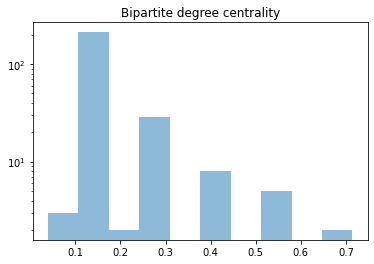

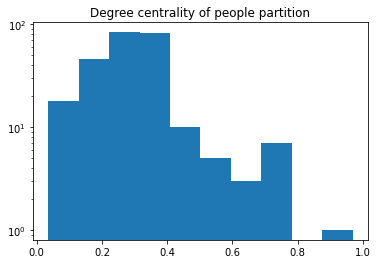

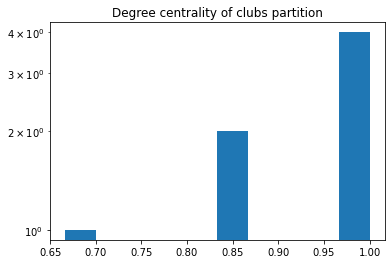

In [44]:
# Plot the degree centrality distribution of both node partitions from the original graph
plt.figure()
original_dc = nx.bipartite.degree_centrality(G, people)
# Remember that you can directly plot dictionary values.
plt.hist(original_dc.values(), alpha=0.5)
plt.yscale('log')
plt.title('Bipartite degree centrality')
plt.show()


# Plot the degree centrality distribution of the peopleG graph
plt.figure()  
people_dc = nx.degree_centrality(peopleG)
plt.hist(people_dc.values())
plt.yscale('log')
plt.title('Degree centrality of people partition')
plt.show()

# Plot the degree centrality distribution of the clubsG graph
plt.figure() 
clubs_dc = nx.degree_centrality(clubsG)
plt.hist(clubs_dc.values())
plt.yscale('log')
plt.title('Degree centrality of clubs partition')
plt.show()

In [45]:
# Get the list of people and list of clubs from the graph: people_nodes, clubs_nodes
people_nodes = get_nodes_from_partition(G, 'people')
clubs_nodes = get_nodes_from_partition(G, 'clubs')

# Compute the biadjacency matrix: bi_matrix
bi_matrix = nx.bipartite.biadjacency_matrix(G, row_order=people_nodes, column_order=clubs_nodes)

# Compute the user-user projection: user_matrix
user_matrix = bi_matrix @ bi_matrix.T

print(user_matrix)

  (0, 52)	1
  (0, 51)	1
  (0, 50)	1
  (0, 49)	1
  (0, 48)	1
  (0, 47)	1
  (0, 46)	1
  (0, 45)	1
  (0, 44)	1
  (0, 43)	1
  (0, 42)	1
  (0, 41)	1
  (0, 40)	1
  (0, 39)	1
  (0, 38)	1
  (0, 37)	1
  (0, 36)	1
  (0, 35)	1
  (0, 34)	1
  (0, 33)	1
  (0, 32)	1
  (0, 31)	1
  (0, 30)	1
  (0, 29)	1
  (0, 28)	1
  :	:
  (253, 215)	1
  (253, 211)	1
  (253, 210)	1
  (253, 209)	1
  (253, 208)	1
  (253, 144)	1
  (253, 119)	1
  (253, 112)	1
  (253, 101)	1
  (253, 100)	1
  (253, 99)	1
  (253, 95)	1
  (253, 81)	1
  (253, 80)	1
  (253, 77)	1
  (253, 75)	1
  (253, 73)	1
  (253, 66)	1
  (253, 62)	1
  (253, 55)	1
  (253, 54)	1
  (253, 53)	1
  (253, 47)	1
  (253, 41)	1
  (253, 1)	1


C:\Users\mkars\AppData\Local\Temp\ipykernel_20472\2837180852.py:6: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  bi_matrix = nx.bipartite.biadjacency_matrix(G, row_order=people_nodes, column_order=clubs_nodes)


In [46]:
# Find out the names of people who were members of the most number of clubs
diag = user_matrix.diagonal() 
indices = np.where(diag == diag.max())[0]  
print('Number of clubs: {0}'.format(diag.max()))
print('People with the most number of memberships:')
for i in indices:
    print('- {0}'.format(people_nodes[i]))

# Set the diagonal to zero and convert it to a coordinate matrix format
user_matrix.setdiag(0)
users_coo = user_matrix.tocoo()

# Find pairs of users who shared membership in the most number of clubs
indices2 = np.where(users_coo.data == users_coo.data.max())[0]
print('People with most number of shared memberships:')
for idx in indices2:
    print('- {0}, {1}'.format(people_nodes[users_coo.row[idx]], people_nodes[users_coo.col[idx]]))  

Number of clubs: 5
People with the most number of memberships:
- Revere.Paul
- Warren.Joseph
People with most number of shared memberships:
- Revere.Paul, Warren.Joseph
- Warren.Joseph, Church.Benjamin
- Warren.Joseph, Adams.Samuel
- Warren.Joseph, Revere.Paul
- Bass.Henry, Chase.Thomas
- Chase.Thomas, Bass.Henry
- Adams.Samuel, Church.Benjamin
- Adams.Samuel, Warren.Joseph
- Church.Benjamin, Adams.Samuel
- Church.Benjamin, Warren.Joseph


In [47]:
G_people = G

In [48]:
list(G_people.nodes(data=True))[0]

('Ash.Gilbert', {'bipartite': 'people'})

In [49]:
# Initialize a list to store each edge as a record: nodelist
nodelist = []
for n, d in G_people.nodes(data=True):
    # nodeinfo stores one "record" of data as a dict
    nodeinfo = {'person': n} 
    
    # Update the nodeinfo dictionary 
    nodeinfo.update(d)
    
    # Append the nodeinfo to the node list
    nodelist.append(nodeinfo)
    

# Create a pandas DataFrame of the nodelist: node_df
node_df = pd.DataFrame(nodelist)
print(node_df.head())

           person bipartite
0     Ash.Gilbert    people
1  StAndrewsLodge     clubs
2  Barrett.Samuel    people
3    Bell.William    people
4  Blake.Increase    people


In [50]:
list(G_people.edges(data=True))[0]

('Ash.Gilbert', 'StAndrewsLodge', {'weight': 1})

In [51]:
# Initialize a list to store each edge as a record: edgelist
edgelist = []
for n1, n2, d in G_people.edges(data=True):
    # Initialize a dictionary that shows edge information: edgeinfo
    edgeinfo = {'node1':n1, 'node2':n2}
    
    # Update the edgeinfo data with the edge metadata
    edgeinfo.update(d)
    
    # Append the edgeinfo to the edgelist
    edgelist.append(edgeinfo)
    
# Create a pandas DataFrame of the edgelist: edge_df
edge_df = pd.DataFrame(edgelist)
print(edge_df.head())

            node1           node2  weight
0     Ash.Gilbert  StAndrewsLodge       1
1  StAndrewsLodge  Barrett.Samuel       1
2  StAndrewsLodge    Bell.William       1
3  StAndrewsLodge  Blake.Increase       1
4  StAndrewsLodge     Bray.George       1


# Chapter 3 - Comparing graphs & time-dynamic graphs

In [52]:
# U_dicts = nx.read_gpickle('uci-forum.p')
U_dicts = pd.read_pickle('uci-forum.p')

In [53]:
U_dicts.node

{'s630': {'bipartite': 'student'},
 's629': {'bipartite': 'student'},
 's772': {'bipartite': 'student'},
 's667': {'bipartite': 'student'},
 's129': {'bipartite': 'student'},
 's826': {'bipartite': 'student'},
 's41': {'bipartite': 'student'},
 's610': {'bipartite': 'student'},
 's345': {'bipartite': 'student'},
 'f495': {'bipartite': 'forum'},
 's684': {'bipartite': 'student'},
 'f133': {'bipartite': 'forum'},
 's582': {'bipartite': 'student'},
 's297': {'bipartite': 'student'},
 's768': {'bipartite': 'student'},
 's342': {'bipartite': 'student'},
 's581': {'bipartite': 'student'},
 's416': {'bipartite': 'student'},
 's838': {'bipartite': 'student'},
 'f279': {'bipartite': 'forum'},
 'f243': {'bipartite': 'forum'},
 'f230': {'bipartite': 'forum'},
 's646': {'bipartite': 'student'},
 'f329': {'bipartite': 'forum'},
 's871': {'bipartite': 'student'},
 's62': {'bipartite': 'student'},
 's208': {'bipartite': 'student'},
 's33': {'bipartite': 'student'},
 's780': {'bipartite': 'student'},


In [54]:
U_dicts.edge

{'s630': {'f71': {'date': Timestamp('2004-05-30 12:27:08')},
  'f362': {'date': Timestamp('2004-05-30 12:23:53')},
  'f380': {'date': Timestamp('2004-05-30 13:16:50')},
  'f141': {'date': Timestamp('2004-05-30 17:23:29')},
  'f7': {'date': Timestamp('2004-05-30 12:21:21')},
  'f54': {'date': Timestamp('2004-05-30 01:12:49')},
  'f467': {'date': Timestamp('2004-05-30 12:19:48')}},
 's629': {'f12': {'date': Timestamp('2004-05-30 00:35:15')}},
 's772': {'f402': {'date': Timestamp('2004-09-02 00:07:08')}},
 's667': {'f107': {'date': Timestamp('2004-06-01 12:10:03')}},
 's129': {'f314': {'date': Timestamp('2004-06-01 10:39:20')},
  'f43': {'date': Timestamp('2004-10-11 07:55:47')},
  'f168': {'date': Timestamp('2004-10-11 21:30:16')},
  'f387': {'date': Timestamp('2004-05-27 05:52:44')},
  'f90': {'date': Timestamp('2004-10-10 11:34:36')},
  'f260': {'date': Timestamp('2004-10-10 18:45:20')},
  'f13': {'date': Timestamp('2004-10-11 21:25:30')},
  'f123': {'date': Timestamp('2004-10-14 04:55

In [55]:
U_full = nx.Graph()

In [56]:
U_edges = []
for node, edges in U_dicts.edge.items():
    for e, d in edges.items():
        U_edges.append(tuple([node, e, d]))

In [57]:
U_full.add_edges_from(U_edges)

In [58]:
nx.set_node_attributes(U_full, U_dicts.node)

In [59]:
type(U_full), len(U_full.nodes), len(U_full.edges)

(networkx.classes.graph.Graph, 1421, 7089)

In [60]:
data = nx.to_pandas_edgelist(U_full) 
data.columns = ['sender', 'recipient', 'time']
data['year'] = data.time.dt.year
data['month'] = data.time.dt.month
data['day'] = data.time.dt.day
data['hour'] = data.time.dt.hour
data['minute'] = data.time.dt.minute
data['second'] = data.time.dt.second
data.head()

,sender,recipient,time,year,month,day,hour,minute,second
0,s630,f71,2004-05-30 12:27:08,2004,5,30,12,27,8
1,s630,f362,2004-05-30 12:23:53,2004,5,30,12,23,53
2,s630,f380,2004-05-30 13:16:50,2004,5,30,13,16,50
3,s630,f141,2004-05-30 17:23:29,2004,5,30,17,23,29
4,s630,f7,2004-05-30 12:21:21,2004,5,30,12,21,21


In [61]:
data.month.unique()

array([ 5,  6, 10,  7,  8,  9], dtype=int64)

In [62]:
months = range(5, 11)

# Initialize an empty list: Gs
Gs = [] 
for month in months:
    # Instantiate a new undirected graph: G
    G = nx.Graph()
    
    # Add in all nodes that have ever shown up to the graph
    G.add_nodes_from(data['sender'])
    G.add_nodes_from(data['recipient'])
    
    # Filter the DataFrame so that there's only the given month
    df_filtered = data[data['month'] == month]
    
    # Add edges from filtered DataFrame
    G.add_edges_from(zip(df_filtered['sender'], df_filtered['recipient']))
    
    # Append G to the list of graphs
    Gs.append(G)
    
print(len(Gs))

6


In [63]:
# Instantiate a list of graphs that show edges added: added
added = []
# Instantiate a list of graphs that show edges removed: removed
removed = []
# Here's the fractional change over time
fractional_changes = []
window = 1  
i = 0      

for i in range(len(Gs) - window):
    g1 = Gs[i]
    g2 = Gs[i + window]
        
    # Compute graph difference here
    added.append(nx.difference(g2, g1))   
    removed.append(nx.difference(g1, g2))
    
    # Compute change in graph size over time
    fractional_changes.append((len(g2.edges()) - len(g1.edges())) / len(g1.edges()))
    
# Print the fractional change
print(fractional_changes)

[-0.13509255612445845, -0.6775956284153005, -0.24293785310734464, 0.1921641791044776, -0.26291079812206575]


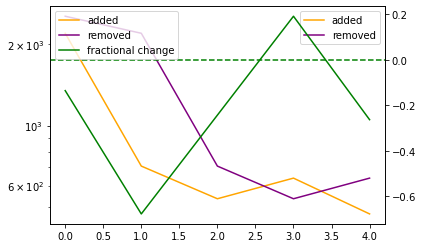

In [64]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

# Plot the number of edges added over time
edges_added = [len(g.edges()) for g in added]
plot1 = ax1.plot(edges_added, label='added', color='orange')

# Plot the number of edges removed over time
edges_removed = [len(g.edges()) for g in removed]
plot2 = ax1.plot(edges_removed, label='removed', color='purple')

# Set yscale to logarithmic scale
ax1.set_yscale('log')  
ax1.legend()

# 2nd axes shares x-axis with 1st axes object
ax2 = ax1.twinx()

# Plot the fractional changes over time
plot3 = ax2.plot(fractional_changes, label='fractional change', color='green')

# Here, we create a single legend for both plots
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc=0)
plt.axhline(0, color='green', linestyle='--')
plt.show()

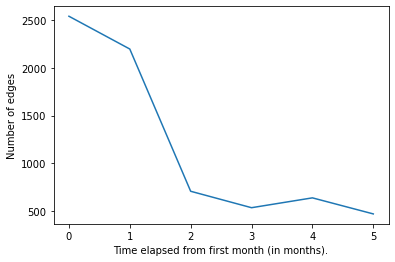

In [65]:
fig = plt.figure()

# Create a list of the number of edges per month
edge_sizes = [len(g.edges()) for g in Gs]

# Plot edge sizes over time
plt.plot(edge_sizes)
plt.xlabel('Time elapsed from first month (in months).') 
plt.ylabel('Number of edges')                           
plt.show() 

In [66]:
def ECDF(vals):
    n = len(vals)
    x = sorted(vals)
    y = np.arange(1, n+1) / n
    
    return x, y

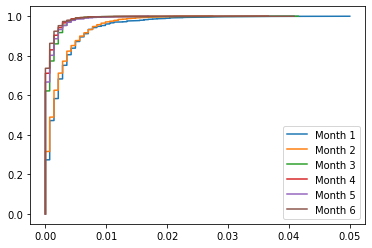

In [67]:
# Create a list of degree centrality scores month-by-month
cents = []
for G in Gs:
    cent = nx.degree_centrality(G)
    cents.append(cent)

# Plot ECDFs over time
fig = plt.figure()
for i in range(len(cents)):
    x, y = ECDF(cents[i].values()) 
    plt.plot(x, y, label='Month {0}'.format(i+1)) 
plt.legend()   
plt.show()

In [68]:
# Get the top 5 unique degree centrality scores: top_dcs
top_dcs = sorted(set(nx.degree_centrality(G).values()), reverse=True)[0:5]

# Create list of nodes that have the top 5 highest overall degree centralities
top_connected = []
for n, dc in nx.degree_centrality(G).items():
    if dc in top_dcs:
        top_connected.append(n)
        
# Print the number of nodes that share the top 5 degree centrality scores
print(len(top_connected))

9


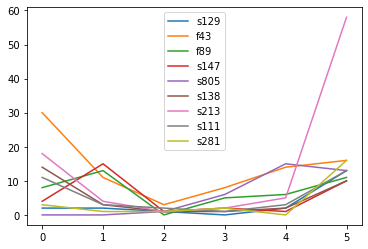

In [69]:
# Create a defaultdict in which the keys are nodes and the values are a list of connectivity scores over time
connectivity = defaultdict(list)
for n in top_connected:
    for g in Gs:
        connectivity[n].append(len(list(g.neighbors(n))))

# Plot the connectivity for each node
fig = plt.figure() 
for n, conn in connectivity.items():
    plt.plot(conn, label=n)
plt.legend()  
plt.show()

# Chapter 4 - Tying it up!

In [78]:
data = nx.to_pandas_edgelist(U_full) 
data.columns = ['student', 'forum', 'date']
print(data.shape)
data.head()

(7089, 3)


,student,forum,date
0,s630,f71,2004-05-30 12:27:08
1,s630,f362,2004-05-30 12:23:53
2,s630,f380,2004-05-30 13:16:50
3,s630,f141,2004-05-30 17:23:29
4,s630,f7,2004-05-30 12:21:21


In [80]:
# Instantiate a new Graph: G
G = nx.Graph()

# Add nodes from each of the partitions
G.add_nodes_from(data['student'], bipartite='student')
G.add_nodes_from(data['forum'], bipartite='forum')

# Add in each edge along with the date the edge was created
for r, d in data.iterrows():
    G.add_edge(d['student'], d['forum'], date=d['date']) 

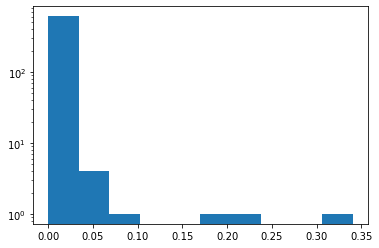

In [81]:
# Get the student partition's nodes: student_nodes
student_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 'student']

# Create the students nodes projection as a graph: G_students
G_students = nx.bipartite.projected_graph(G, nodes=student_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_students)

# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log')  
plt.show() 

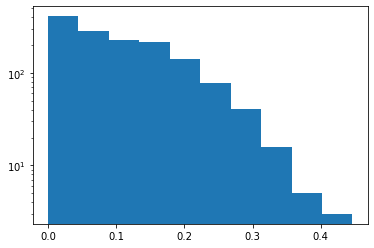

In [82]:
# Get the forums partition's nodes: forum_nodes
forum_nodes = [n for n, d in G.nodes(data=True) if d['bipartite']=='forum']

# Create the forum nodes projection as a graph: G_forum
G_forum = nx.bipartite.projected_graph(G, nodes=forum_nodes)

# Calculate the degree centrality using nx.degree_centrality: dcs
dcs = nx.degree_centrality(G_forum)

# Plot the histogram of degree centrality values
plt.hist(list(dcs.values()))
plt.yscale('log') 
plt.show()  

In [84]:
# Instantiate a new graph: G_sub
G_sub = nx.Graph()

# Add nodes from the original graph
G_sub.add_nodes_from(G.nodes(data=True))

# Add edges using a list comprehension with one conditional on the edge dates, that the date of the edge is earlier than 2004-05-16.
G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] < datetime(2004,5,16)])

In [85]:
len(G_sub.nodes), len(G_sub.edges)

(1421, 70)

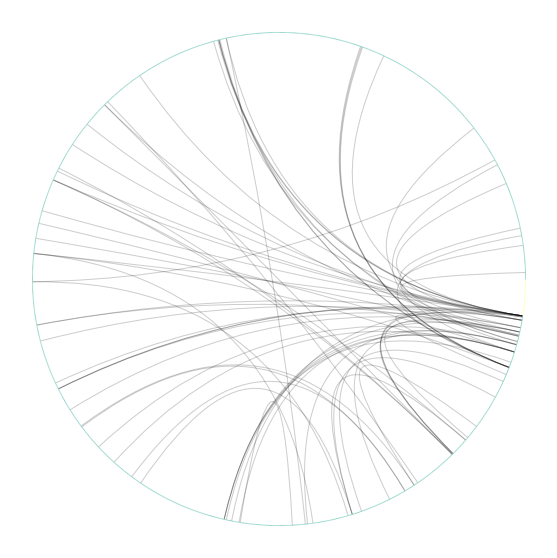

In [86]:
# Compute degree centrality scores of each node
dcs = nx.bipartite.degree_centrality(G, nodes=forum_nodes)
for n, d in G_sub.nodes(data=True):
    G_sub.nodes[n]['dc'] = dcs[n]

# Create the Circos Plot object: 
fig, ax = plt.subplots(figsize=(10, 10))
ax = nv.circos(G_sub, node_color_by='bipartite', group_by='bipartite', sort_by='dc')
plt.show()

In [88]:
len(G.nodes), len(G.edges)

(1421, 7089)

In [89]:
dayone = datetime(2004, 5, 14, 0, 0)
lastday = datetime(2004, 10, 26, 0, 0)

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


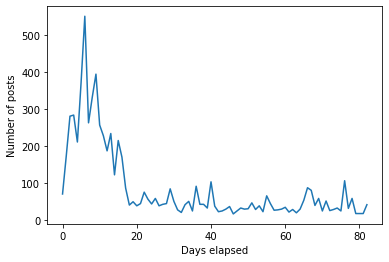

In [91]:
# Define current day and timedelta of 2 days
curr_day = dayone
td = timedelta(days=2)

# Initialize an empty list of posts by day
n_posts = []
while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day) 
    # Filter edges such that they are within the sliding time window: edges
    edges = [(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td]
    
    # Append number of edges to the n_posts list
    n_posts.append(len(edges))
    # Increment the curr_day by the time delta
    curr_day += td
   
# Create the plot 
plt.plot(n_posts)  
plt.xlabel('Days elapsed')
plt.ylabel('Number of posts')
plt.show()  

In [95]:
data.student.describe()

count     7089
unique     864
top         f7
freq       125
Name: student, dtype: object

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


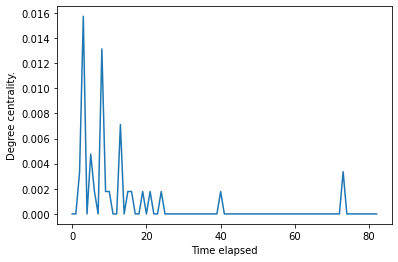

In [96]:
# Initialize a new list: mean_dcs
mean_dcs = []
curr_day = dayone
td = timedelta(days=2)

while curr_day < lastday:
    if curr_day.day == 1:
        print(curr_day)  
    # Instantiate a new graph containing a subset of edges: G_sub
    G_sub = nx.Graph()
    # Add nodes from G
    G_sub.add_nodes_from(G.nodes(data=True))
    # Add in edges that fulfill the criteria
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # Get the students projection
    G_student_sub = nx.bipartite.projected_graph(G_sub, nodes=student_nodes)
    # Compute the degree centrality of the students projection
    dc = nx.degree_centrality(G_student_sub)
    # Append mean degree centrality to the list mean_dcs
    mean_dcs.append(np.mean(list(dc.values())))
    # Increment the time
    curr_day += td
    
plt.plot(mean_dcs)
plt.xlabel('Time elapsed')
plt.ylabel('Degree centrality.')
plt.show()

2004-06-01 00:00:00
2004-07-01 00:00:00
2004-08-01 00:00:00
2004-09-01 00:00:00
2004-10-01 00:00:00


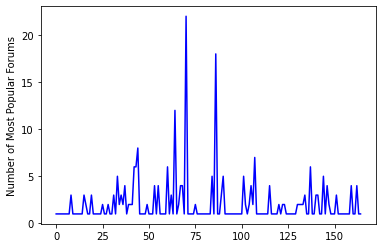

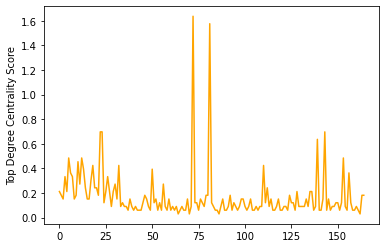

In [98]:
# Instantiate a list to hold the list of most popular forums by day: most_popular_forums
most_popular_forums = []
# Instantiate a list to hold the degree centrality scores of the most popular forums: highest_dcs
highest_dcs = []
curr_day = dayone  
td = timedelta(days=1)  

while curr_day < lastday:  
    if curr_day.day == 1: 
        print(curr_day) 
    # Instantiate new graph: G_sub
    G_sub = nx.Graph()
    
    # Add in nodes from original graph G
    G_sub.add_nodes_from(G.nodes(data=True))
    
    # Add in edges from the original graph G that fulfill the criteria
    G_sub.add_edges_from([(u, v, d) for u, v, d in G.edges(data=True) if d['date'] >= curr_day and d['date'] < curr_day + td])
    
    # Get the degree centrality 
    dc = nx.bipartite.degree_centrality(G_sub, forum_nodes)
    # Filter the dictionary such that there's only forum degree centralities
    forum_dcs = {n:dc for n, dc in dc.items() if n in forum_nodes}
    # Identify the most popular forum(s) 
    most_popular_forum = [n for n, dc in forum_dcs.items() if dc == max(forum_dcs.values()) and dc != 0] 
    most_popular_forums.append(most_popular_forum) 
    # Store the highest dc values in highest_dcs
    highest_dcs.append(max(forum_dcs.values()))
    
    curr_day += td  
    
plt.figure(1) 
plt.plot([len(forums) for forums in most_popular_forums], color='blue', label='Forums')
plt.ylabel('Number of Most Popular Forums')
plt.show()

plt.figure(2)
plt.plot(highest_dcs, color='orange', label='DC Score')
plt.ylabel('Top Degree Centrality Score')
plt.show()

On a per-day basis, it would be interesting to see which forums were the most popular over time. Some further questions might include - was it the same set over time? Or were some forums really popular early on and others popular later on?